# Spatial Filtering

## Linear Filter

### Linear or Non-linear
$$\begin{equation}
\begin{aligned}
&T(a_1x_1+a_2x_2) = a_1T(x_1) + a_2T(x_2)\\
&T(x) = 2x_1 + 3x_2+1\\
&T(x) = 2x_1 + 3x_2 \\
&T(x) = 2x_1 + 3x_2^2\\
\end{aligned}
\end{equation}
$$

### Correlation
Slide the template over the image and calculate the value at each pixel next to each other:
$$g(i, j) = w(i, j) \cdot f(i, j) = \sum^{K/2}_{s=-K/2}\sum^{K/2}_{t=-K/2}w(s, t)f(i + s, j + t)$$.

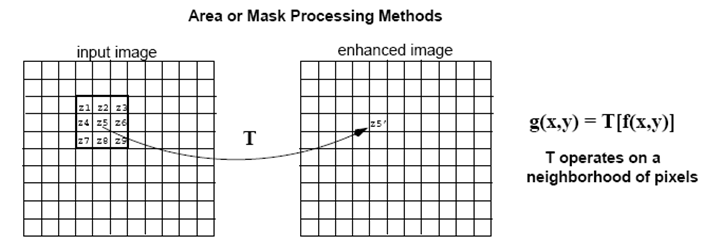

### Convolution

Rotate the template by 180 degrees, and the rest are the same as the correlation operations:
$$g(i, j) = w(i, j) \cdot f(i, j) = \sum^{K/2}_{s=-K/2}\sum^{K/2}_{t=-K/2}w(s, t)f(i - s, j - t)$$

### Conditions for Correlation and Convolution Equivalence

1. The convolution kernel is symmetrical from left to right;

2. The convolution kernel parameters are learned by the neural network itself, not manually specified.

### Boundary Processing

While performing convolution, there are three options we can choose regarding the convolution-output image size.

1. Full: the output size is sum of an image f and kernel g (when at least one pixel overlaps between f and g)
2. Same: the output size is same as image f (when at least the center of filter overlaps)
     
    Padding the border of the image to keep the size of the image unchanged:
    $$padding = \frac{\textit{kernel_size} − 1}{2}$$
    kenel_size=3, padding=1; kernel_size=5, padding=2; kernel_size=7, padding=3; ...
    
3. valid: the output size matches neither image f nor kernel g

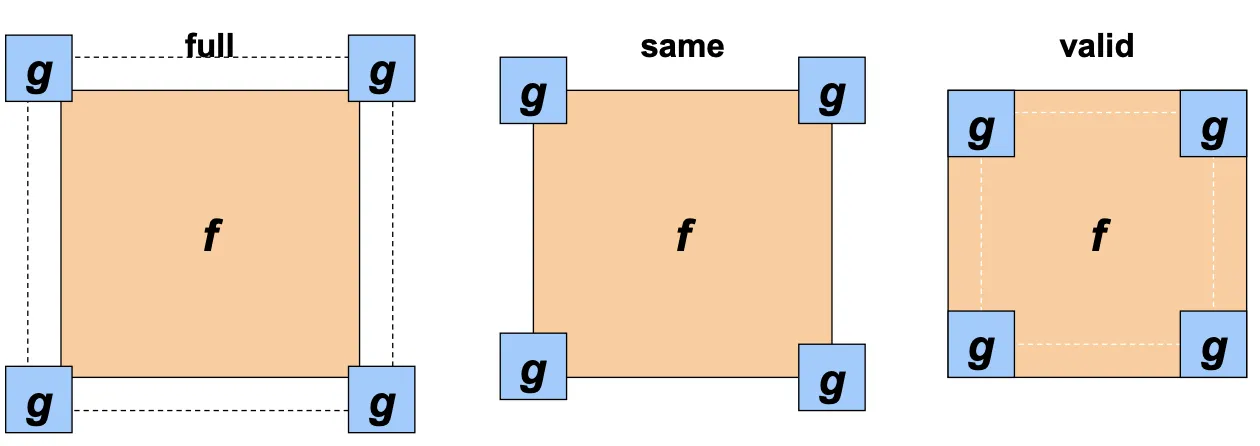

## Non-linear Filter

- Based on the sorting of pixel values in the patch, get the pixel value from the center point;

- The median filter is the most famous nonlinear filter, often used in salt and pepper noise;

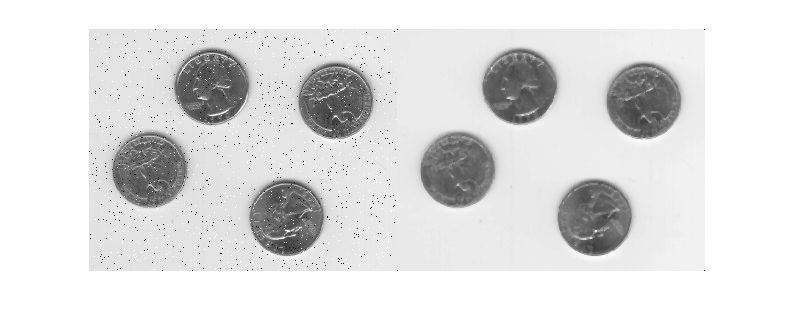

## Filters by Frequency

- Low-pass filters: Allow passing only low frequency details, attenuates the high frequency details. Example: Smoothening filters.
- High-pass filters: Allows passing only high frequency details, attenuates the low frequency details. Example: Sharpening mask filters.
- Band-reject (Band-stop) filters: Attenuate signal in range of a certain frequency. Allows frequency below a certain threshold and above another threshold to pass.
- Band-pass filters: Only allows signals within a certain band to pass, attenuates the frequencies below a threshold and above another threshold to pass.

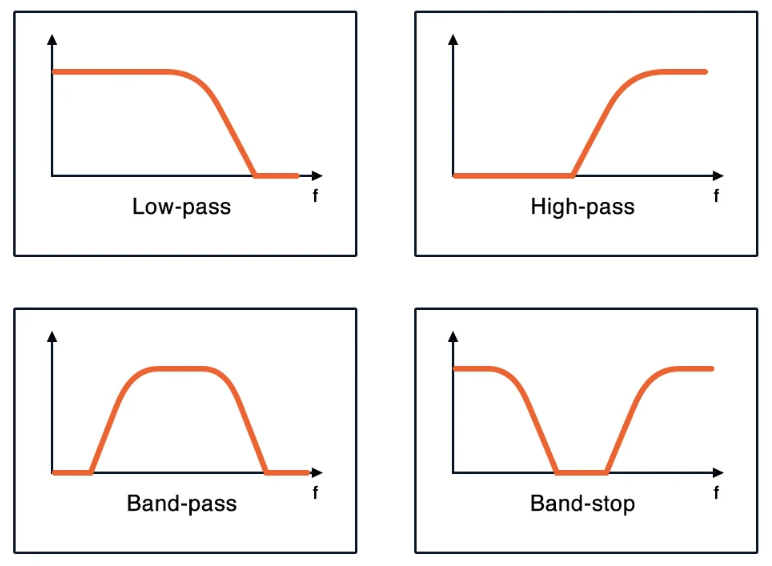

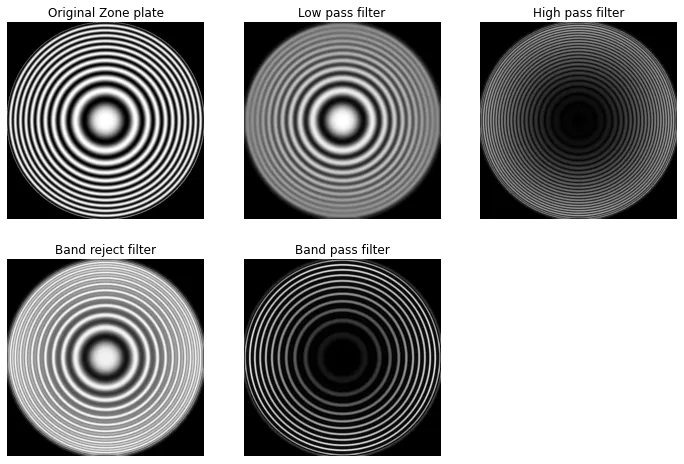

## Noise Classification

### Gaussian Noise

The probability density function $p$ of a Gaussian random variable:
$$p_{G}(z) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(z-\mu)^2}{2\sigma^2}},$$

where $z$ represents the grey level, $\mu$ is the mean grey value and $\sigma$ is its standard deviation,

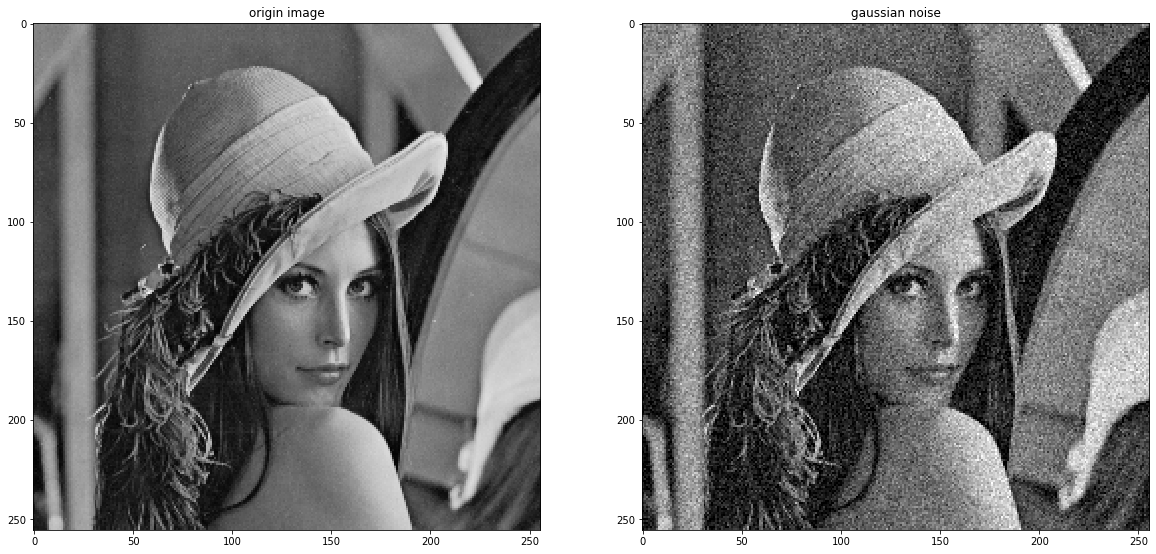

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('origin image')
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

plt.subplot(122)
plt.title('gaussian noise')
# generate the gaussian noise with mean 0 and standard deviation 20
noise = np.random.normal(0, 20, image.shape)
plt.imshow(image+noise, vmin=0, vmax=255, cmap='gray')
plt.show()

### Salt and pepper Noise

Salt and pepper noise, also known as impulse noise, is a form of noise sometimes seen on digital images.

This noise can be caused by sharp and sudden disturbances in the image signal.

It presents itself as sparsely occurring white and black pixels.

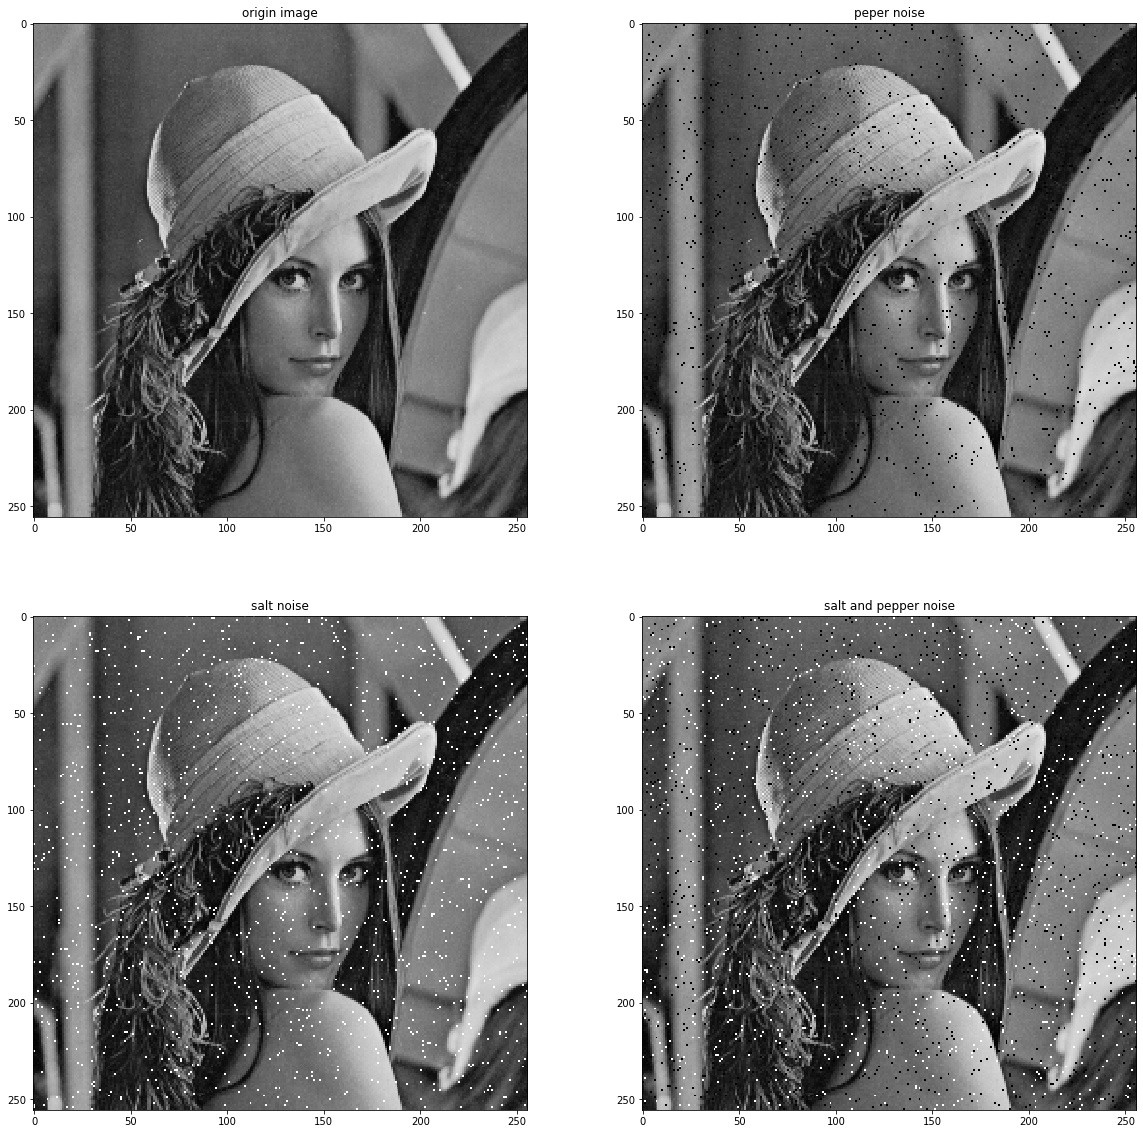

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('origin image')
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

plt.subplot(222)
plt.title('peper noise')
peper = np.random.binomial(1, p=0.02, size=image.shape)
tmp   = image.copy()
tmp[peper==1] = 0
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')

plt.subplot(223)
plt.title('salt noise')
salt  = np.random.binomial(1, p=0.02, size=image.shape)
tmp   = image.copy()
tmp[salt==1] = 255
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')

plt.subplot(224)
plt.title('salt and pepper noise')
salt  = np.random.binomial(1, p=0.02, size=image.shape)
image[salt==1] = 0
image[peper==1] = 255
plt.imshow(image, vmin=0, vmax=255, cmap='gray')
plt.show()

## Low-pass Filtering

- Purpose: Remove image noise and smooth the image.

- The weights of the filter are all non-negative, and their sum is 1.

### Mean Filtering

The contribution of all pixels in the convolution area to the central point is equal.

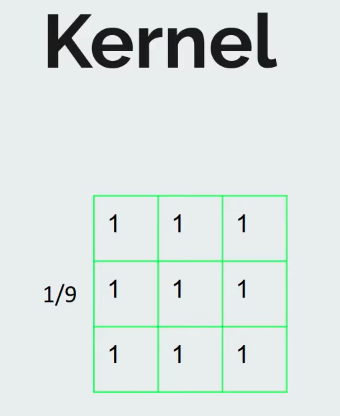

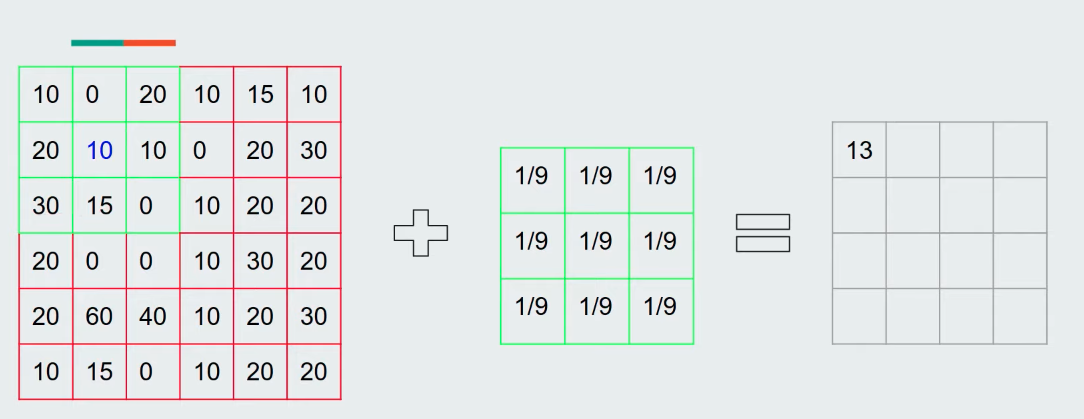

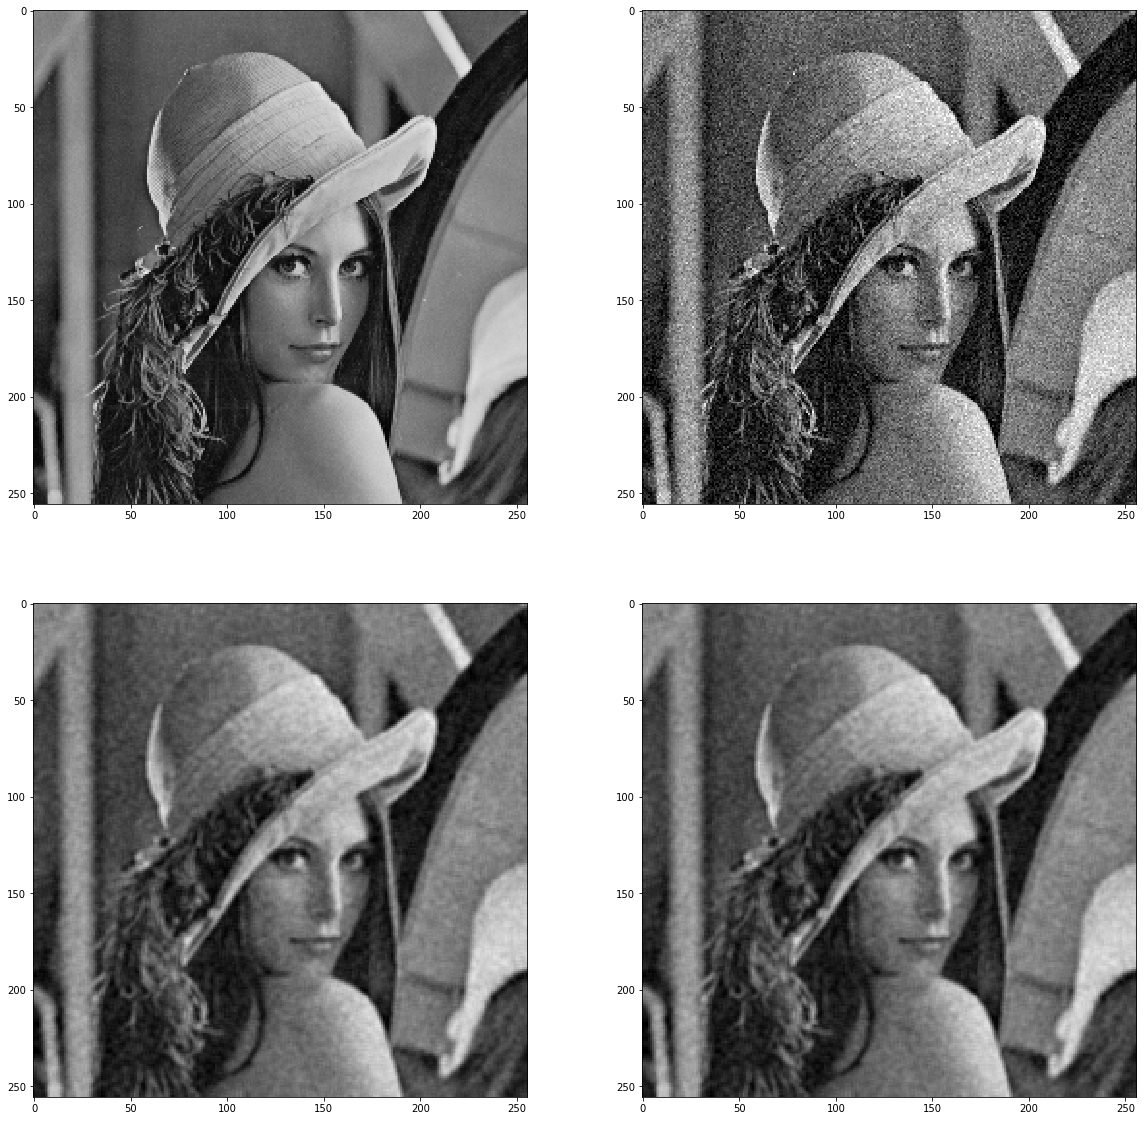

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.subplot(221)
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

# add guassian noise
plt.subplot(222)
noise = np.random.normal(0, 20, image.shape)
image = image + noise
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

# cv2.filter2D
plt.subplot(223)
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')

# cv2.blur
plt.subplot(224)
tmp    = cv2.blur(image, ksize=(3,3))
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')
plt.show()

### Gaussian Filtering

The contribution of the center pixel of the convolution area is the largest, and the farther away from the center point, the smaller the contribution.

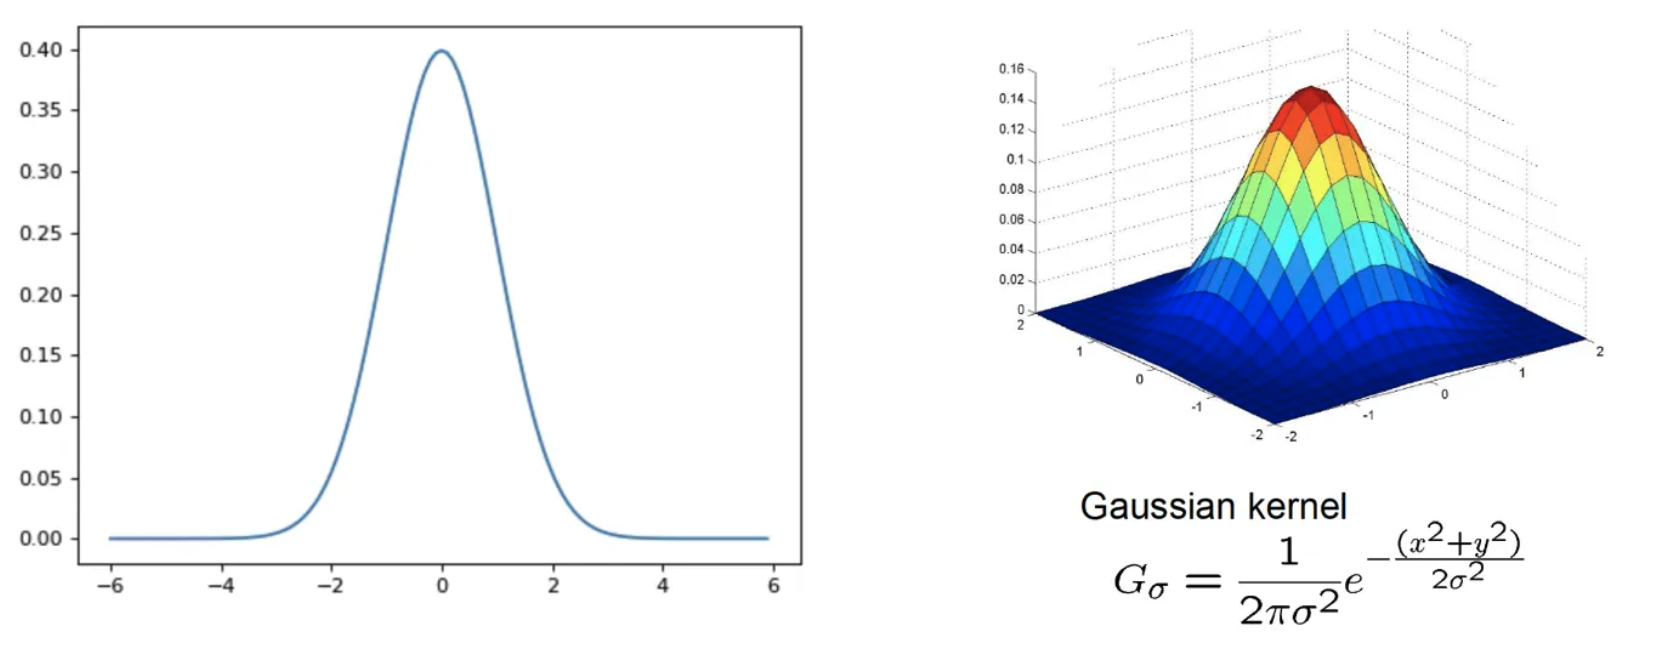

- Computationally efficient: larger filters (e.g., 2D) can be implemented using smaller 1D filters.
- Rotationally symmetric: The degree of smoothing is determined by the given standard deviation $\sigma$.
- Effective to filtering Gaussian noise (low-pass filter)
- Essential when down-sampling images (Gaussian Pyramid)



Fourier transform of Gaussian is a Gaussian, and Fourier transform of Box filter is a sinc function.

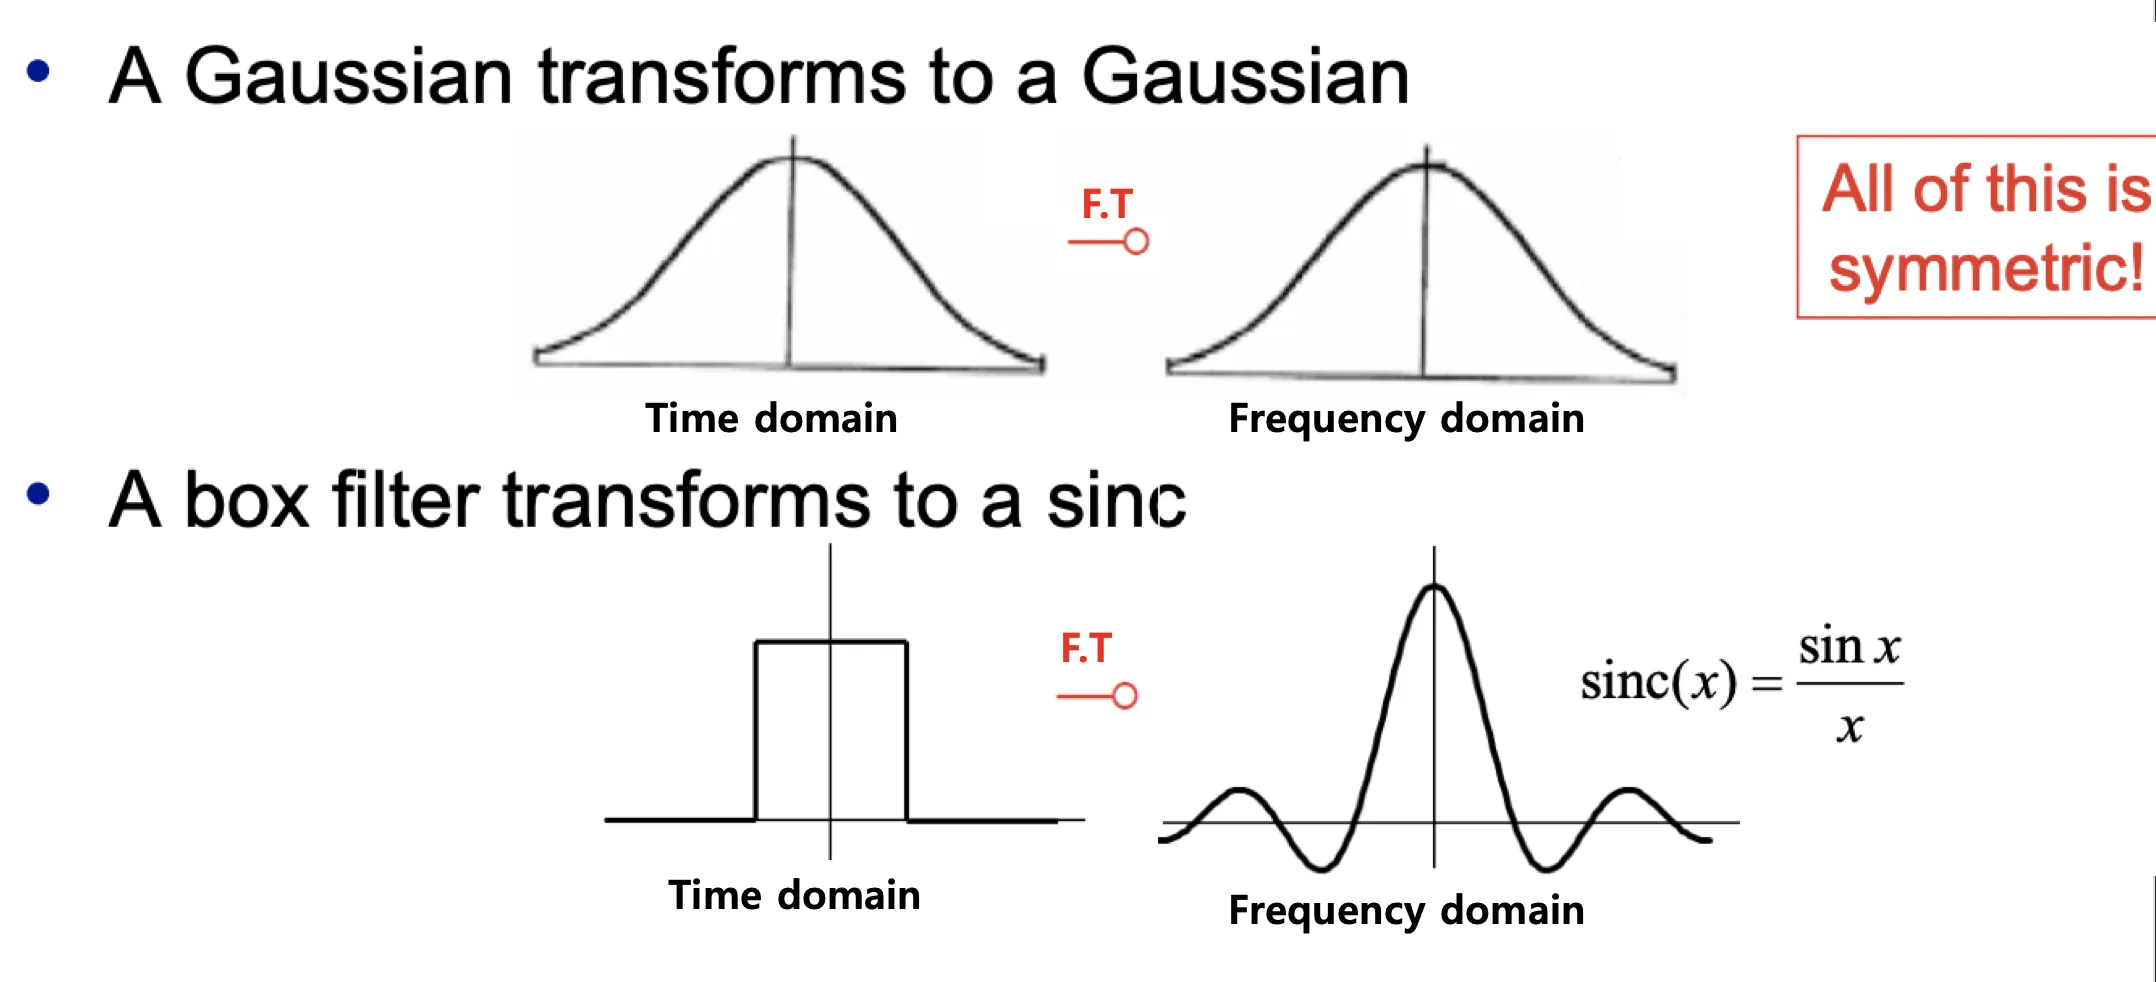

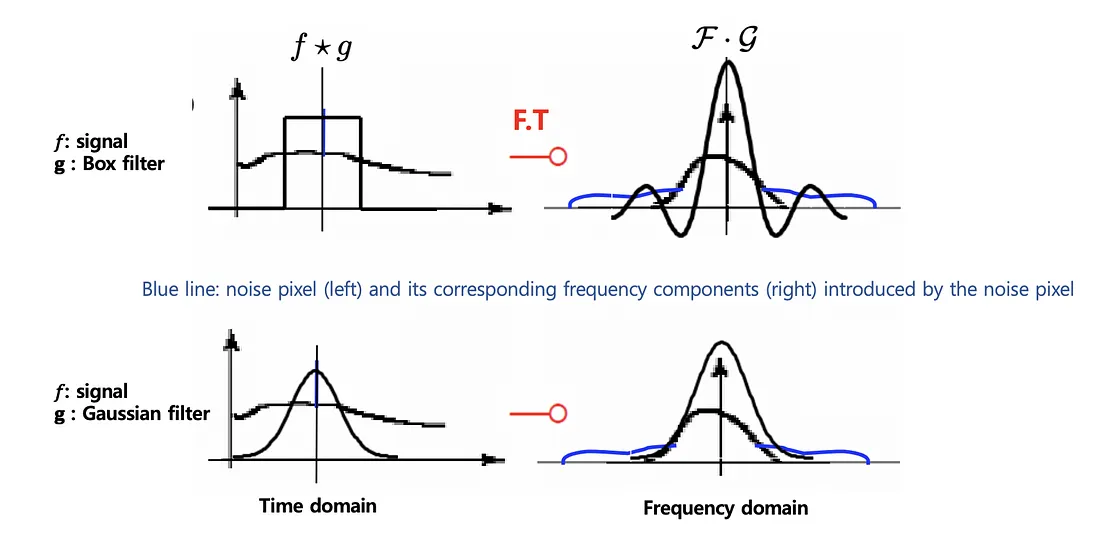

- Gaussian filter is a better chose for $g$ as its fourier-transformed shape is the ideal low-pass filter, allowing only low frequencies to survive.

- Box filter, on the other hand, turns into the sinc function after Fourier transform, and it does not only suppressing high frequencies but also some low frequency components that are responsible for general image structures and are supposed not to be lost.

For more analysis of gaussian filters, please read https://medium.com/jun94-devpblog/cv-2-gaussian-and-median-filter-separable-2d-filter-2d11ee022c66.

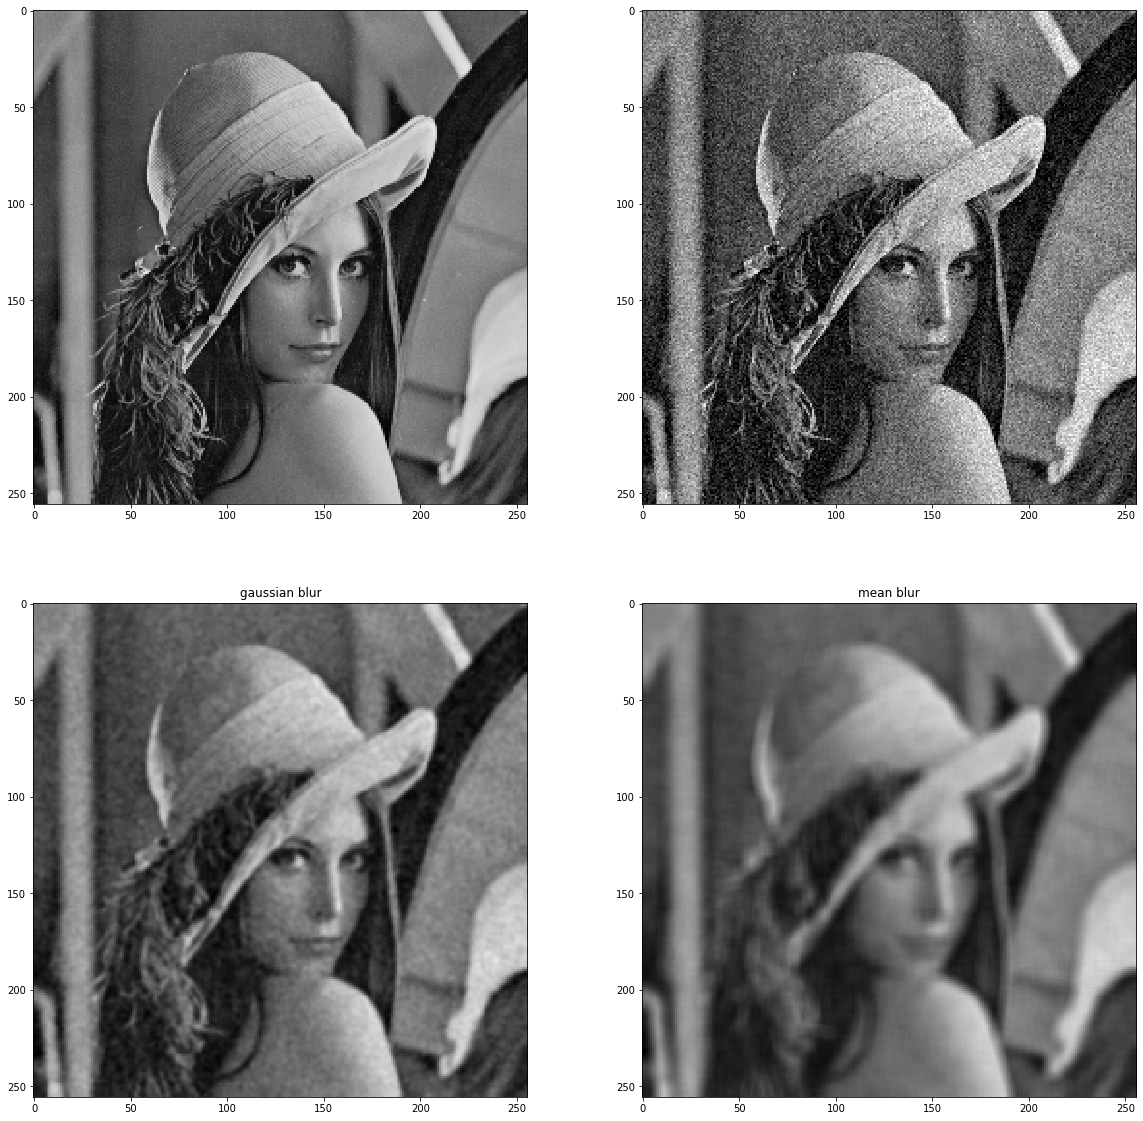

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.subplot(221)
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

plt.subplot(222)
noise = np.random.normal(0, 20, image.shape)
image = image+noise
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

plt.subplot(223)
plt.title('gaussian blur')
tmp  = cv2.GaussianBlur(image, ksize=(7, 7), sigmaX=1, sigmaY=1)
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')

plt.subplot(224)
plt.title('mean blur')
tmp    = cv2.blur(image, ksize=(7,7))
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')
plt.show()

### Median Filtering

- Good for removing salt and pepper noise;
- Sort the pixel values of the convolved area, choosing the median as the value of the center pixel.

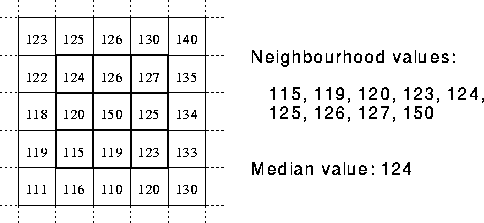

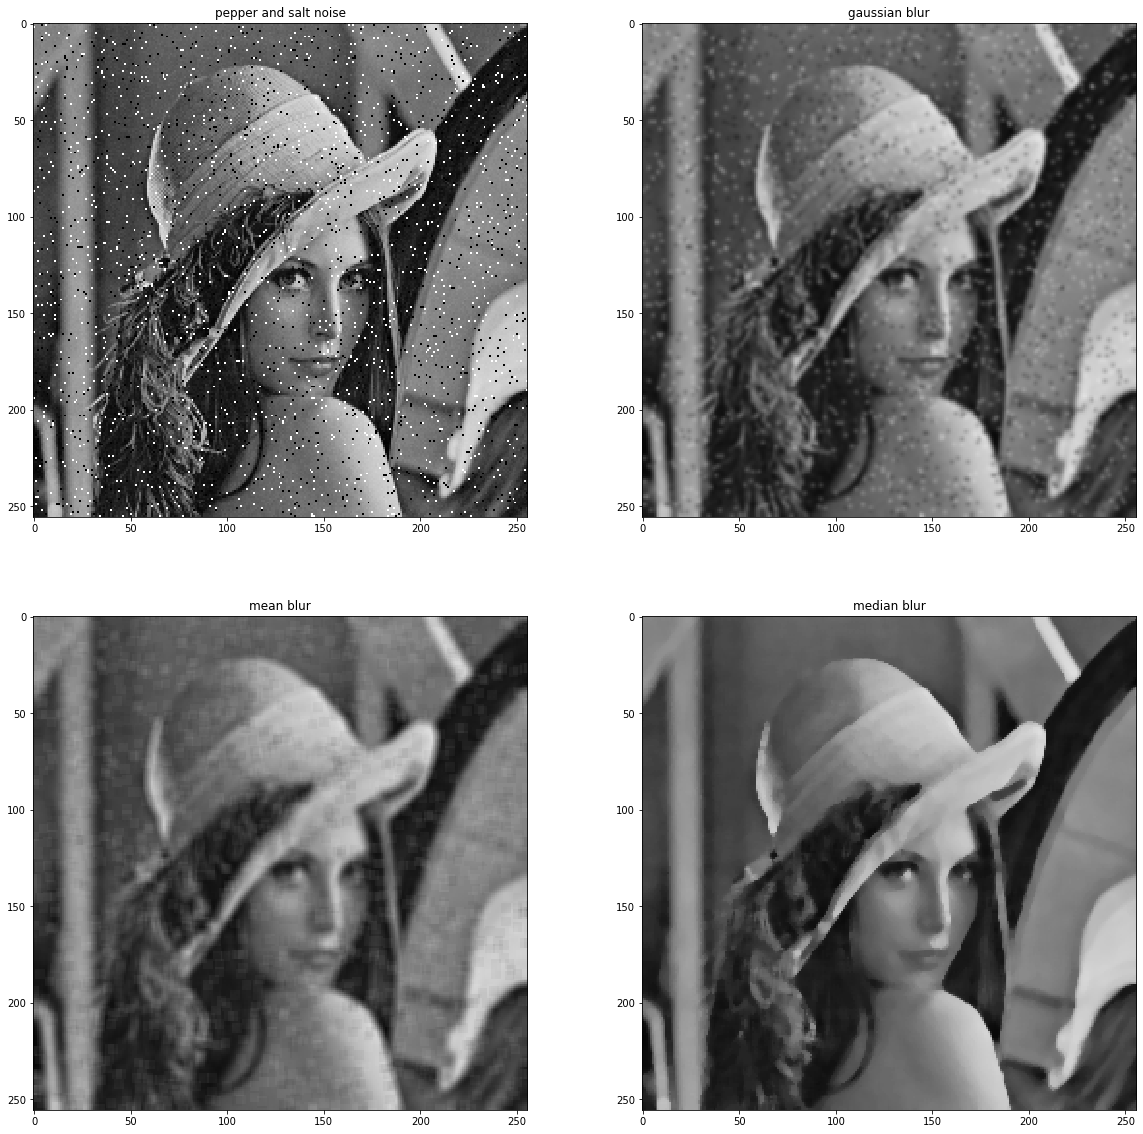

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# add salt and pepper noise
plt.subplot(221)
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)
plt.title('pepper and salt noise')
peper = np.random.binomial(1, p=0.02, size=image.shape)
image[peper==1] = 0
salt  = np.random.binomial(1, p=0.02, size=image.shape)
image[salt==1] = 255
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

# gaussian blur
plt.subplot(222)
plt.title('gaussian blur')
tmp  = cv2.GaussianBlur(image, ksize=(5, 5), sigmaX=1, sigmaY=1)
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')

# mean blur
plt.subplot(223)
plt.title('mean blur')
tmp    = cv2.blur(image, ksize=(5,5))
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')

# median blur
plt.subplot(224)
plt.title('median blur')
tmp    = cv2.medianBlur(image, ksize=5)
plt.imshow(tmp, vmin=0, vmax=255, cmap='gray')
plt.show()

## High-pass Filtering

- Purpose: Enhance the edge information of the image and sharpen the image;
- The weight of the filter can be positive or negative, and the sum is 0.

### Image Gradient

The image gradient is two-dimensional, and the gradient needs to be calculated separately for the $x$ and $y$ directions:
$$\text{grad}(f) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$$
First order gradient:
$$\frac{\partial f}{\partial x} = f(x + 1) - f(x)$$
Second order gradient:
$$\frac{\partial^2 f}{\partial x^2} = [f(x + 1) - f(x)] - [f(x) - f(x - 1)] = f(x + 1) - 2f(x) + f(x - 1)$$

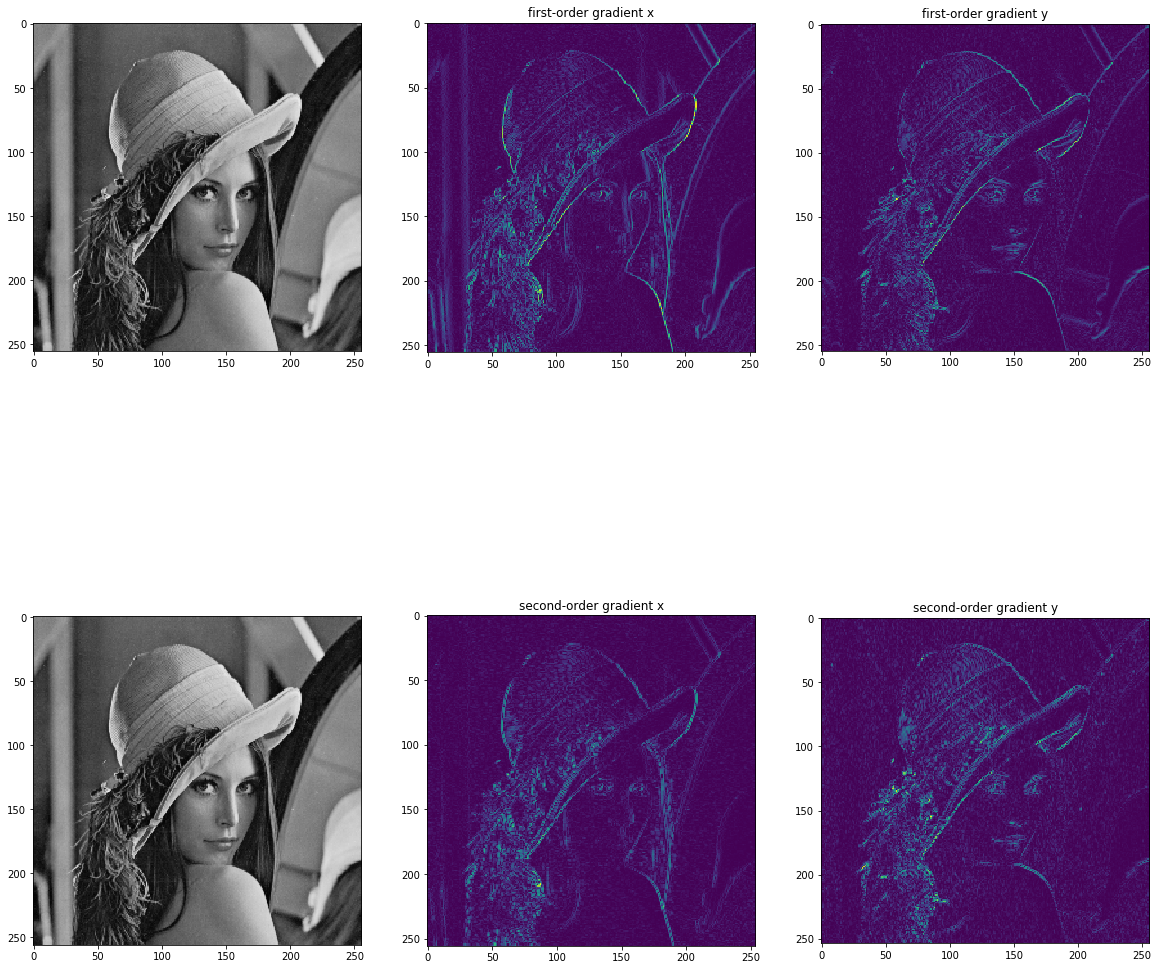

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# first order gradient
plt.figure(figsize=(20, 20))
plt.subplot(231)
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE).astype(np.float32)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')
plt.subplot(232)
plt.title('first-order gradient x')
plt.imshow(np.abs(image[:,1:]-image[:,:-1]))
plt.subplot(233)
plt.title('first-order gradient y')
plt.imshow(np.abs(image[1:,:]-image[:-1,:]))

# second order gradient
plt.subplot(234)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')
plt.subplot(235)
 
plt.imshow(np.abs(image[:,2:]-2*image[:,1:-1]+image[:,:-2]))
plt.subplot(236)
plt.title('second-order gradient y')
plt.imshow(np.abs(image[2:,:]-2*image[1:-1,:]+image[:-2,:]))
plt.show()

## First Order Gradient Template

### Roberts Operator

- Roberts operator approximate the gradient of an imagethrough discrete differentiation.

- Robert mask is $2 \times 2$ matrixRobert mask convolve with the entire image using horizontal and vertical Robert masks to give edge detected image in $x$ direction and $y$ direction respectively.

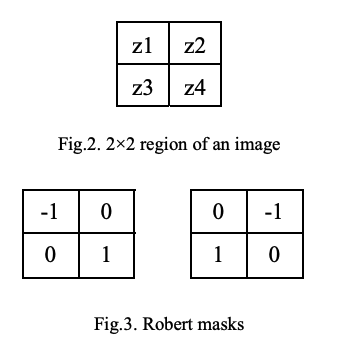

$$g_x = z_4 -z_1$$
$$g_y = z_3 -z_2$$

Advantages: 

- Detection of edges and orientation are very easy.
- Diagonal direction points are preserved.

Limitations: 
 
- Very sensitive to noise.
- Not very accurate in edge detection.

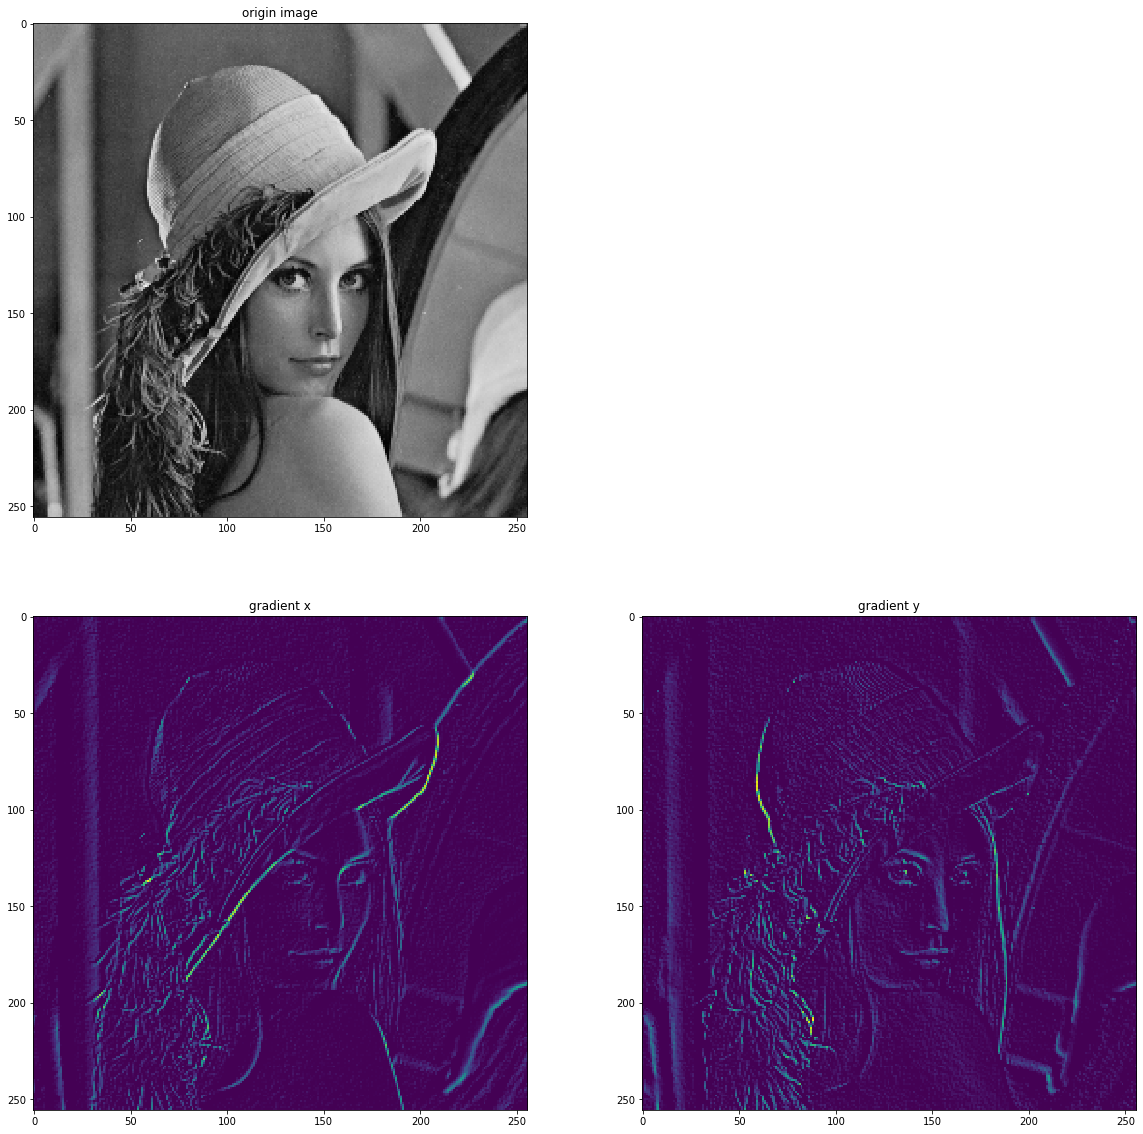

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('origin image')
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

# cv2.filter2D
plt.subplot(223)
plt.title('gradient x')
kernel = np.array([[1, 0],[0, -1]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)

# cv2.filter2D
plt.subplot(224)
plt.title('gradient y')
kernel = np.array([[0,1],[-1,0]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)
plt.show()

### Prewitt Operator

Prewitt mask is a discrete differentiation operator. This operator uses two $3\times3$ masks for calculating approximate derivative values in horizontal and vertical directions.

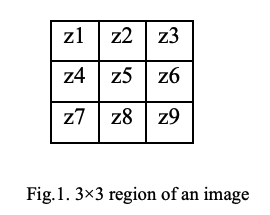

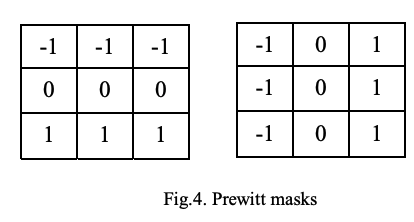

$$g_x = (z_3 + z_6 + z_9) - (z_1 + z_4 + z_7)$$
$$g_y = (z_7 + z_8 + z_9) - (z_1 + z_2 + z_3)$$

Advantages: 
 
- Good performance on detecting vertical and horizontal edges
- Best operator to detect the orientation of an image

Limitations: 
 
- The magnitude of coefficient is fixed and cannot be changed
- Diagonal direction points are not preserved always

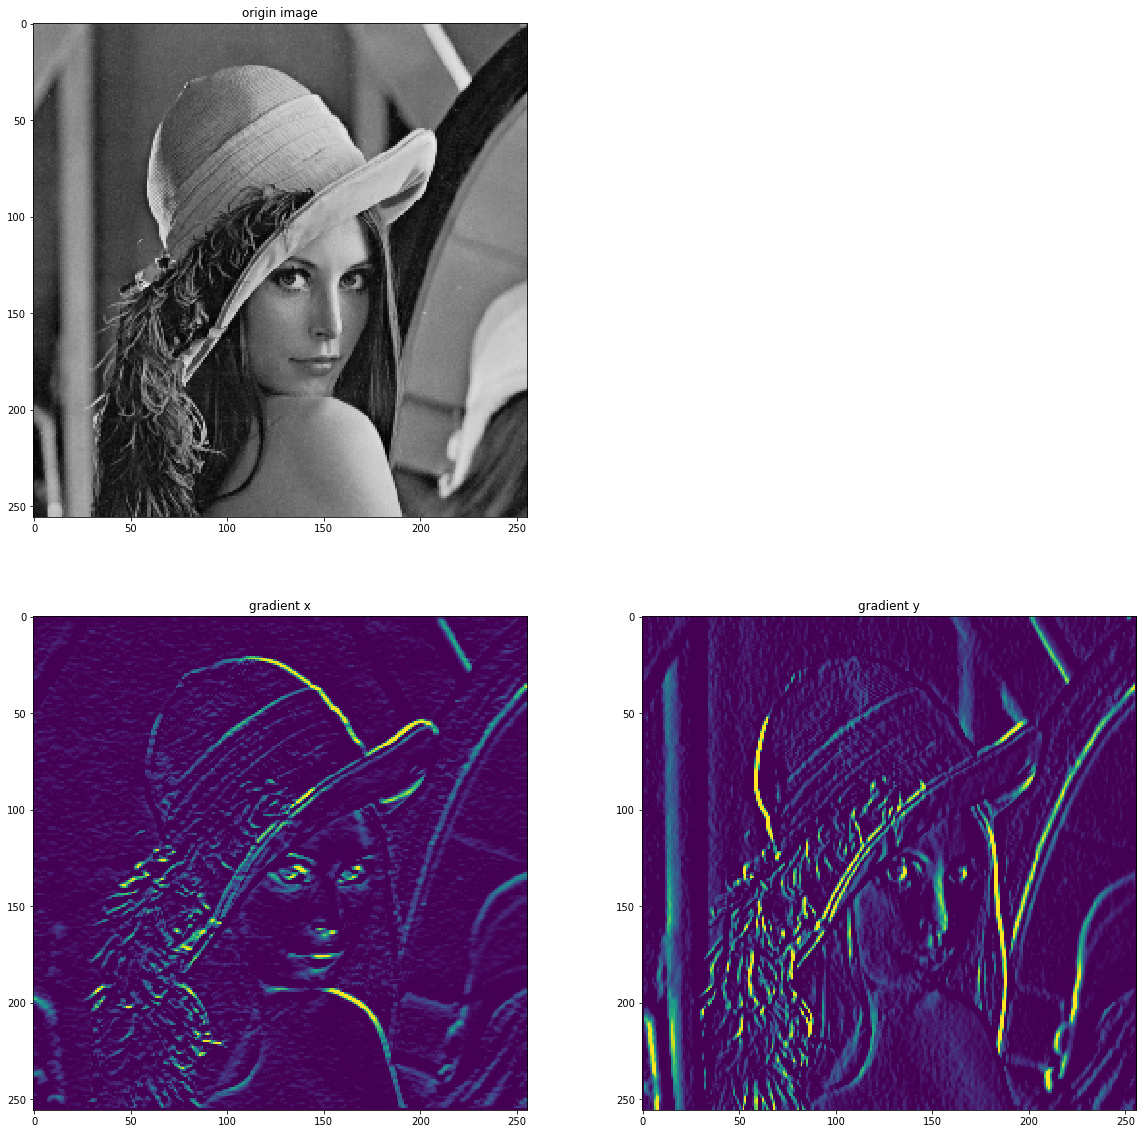

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('origin image')
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

# cv2.filter2D
plt.subplot(223)
plt.title('gradient x')
kernel = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)

# cv2.filter2D
plt.subplot(224)
plt.title('gradient y')
kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)
plt.show()

### Sobel Operator

Sobel mask is same as that of the Prewitt mask. There is only one difference, Sobel operator has ‘2’ and ‘-2’ values in center of first, third column of horizontal mask and first, third  rows of vertical mask. This gives more weightage to the pixel values around the edge region, hence increases the edge intensity.

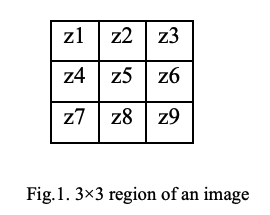

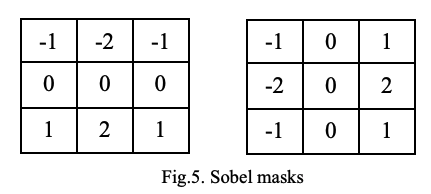

$$g_x = (z_3 + 2z_6 + z_9) - (z_1 + 2z_4 + z_7)$$
$$g_y = (z_7 + 2z_8 + z_9) - (z_1 + 2z_2 + z_3)$$

Advantages: 

- Simple and time efficient computation.
- Very easy at searching for smooth edges.

Limitations: 
 
- Diagonal direction points are not preserved always.
- Highly sensitive to noise.
- Not very accurate in edge detection.
- Detect with thick and rough edges does not give appropriate results.

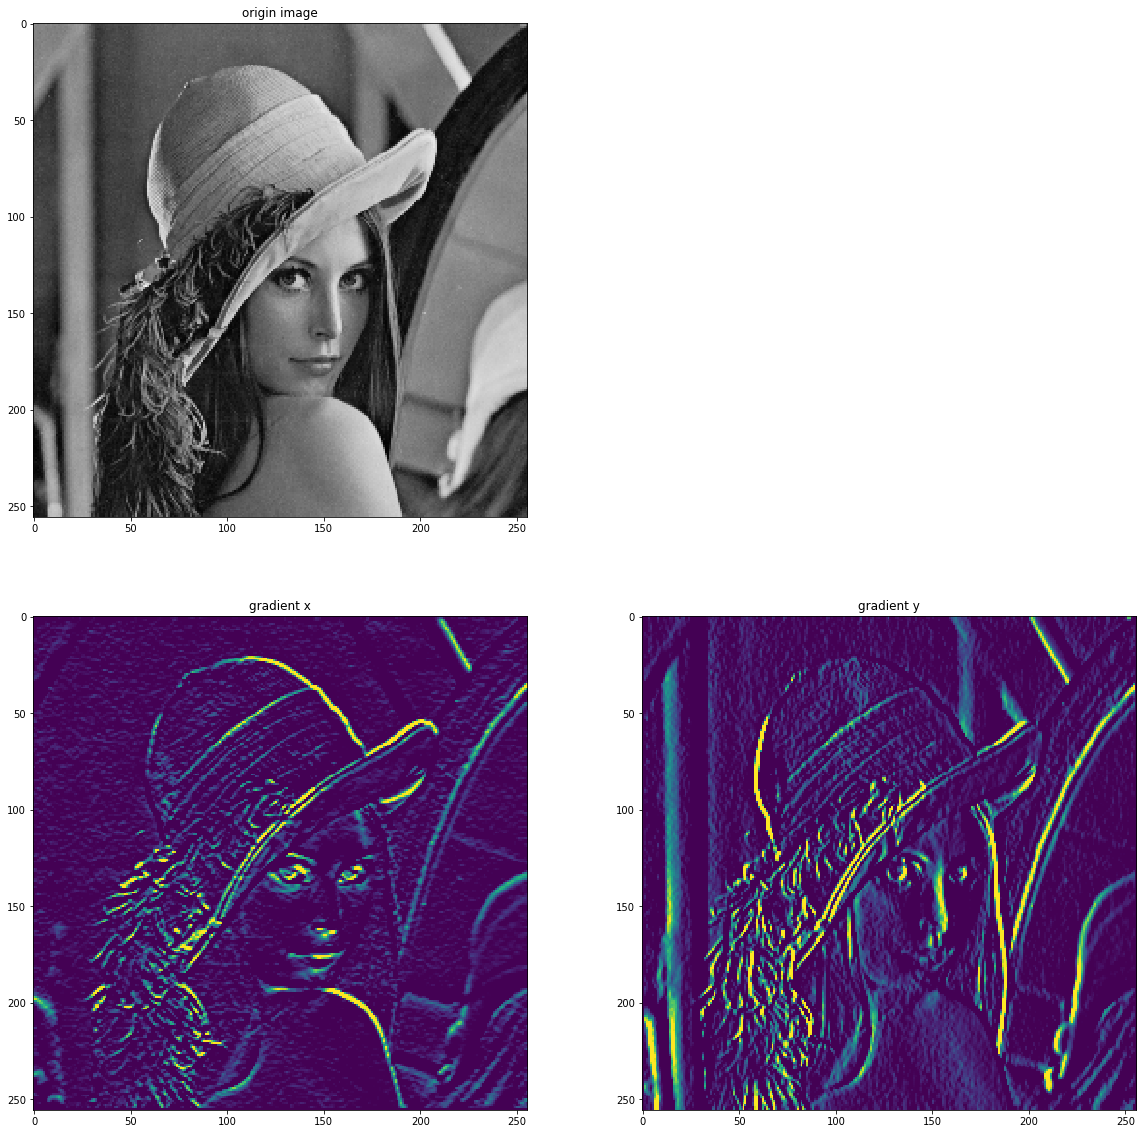

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('origin image')
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

# cv2.filter2D
plt.subplot(223)
plt.title('gradient x')
kernel = np.array([[-1,-2,-1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)

# cv2.filter2D
plt.subplot(224)
plt.title('gradient y')
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)
plt.show()

## Second Order Gradient Template

### Laplacian Operator

Add $x$ and $y$ direction gradient templates:

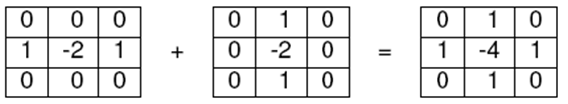

These masks are approximating a second derivative measurement on the image, so they are very sensitive to noise.

To correct this, the image is often Gaussian smoothed (denoising) before applying the Laplacian filter.

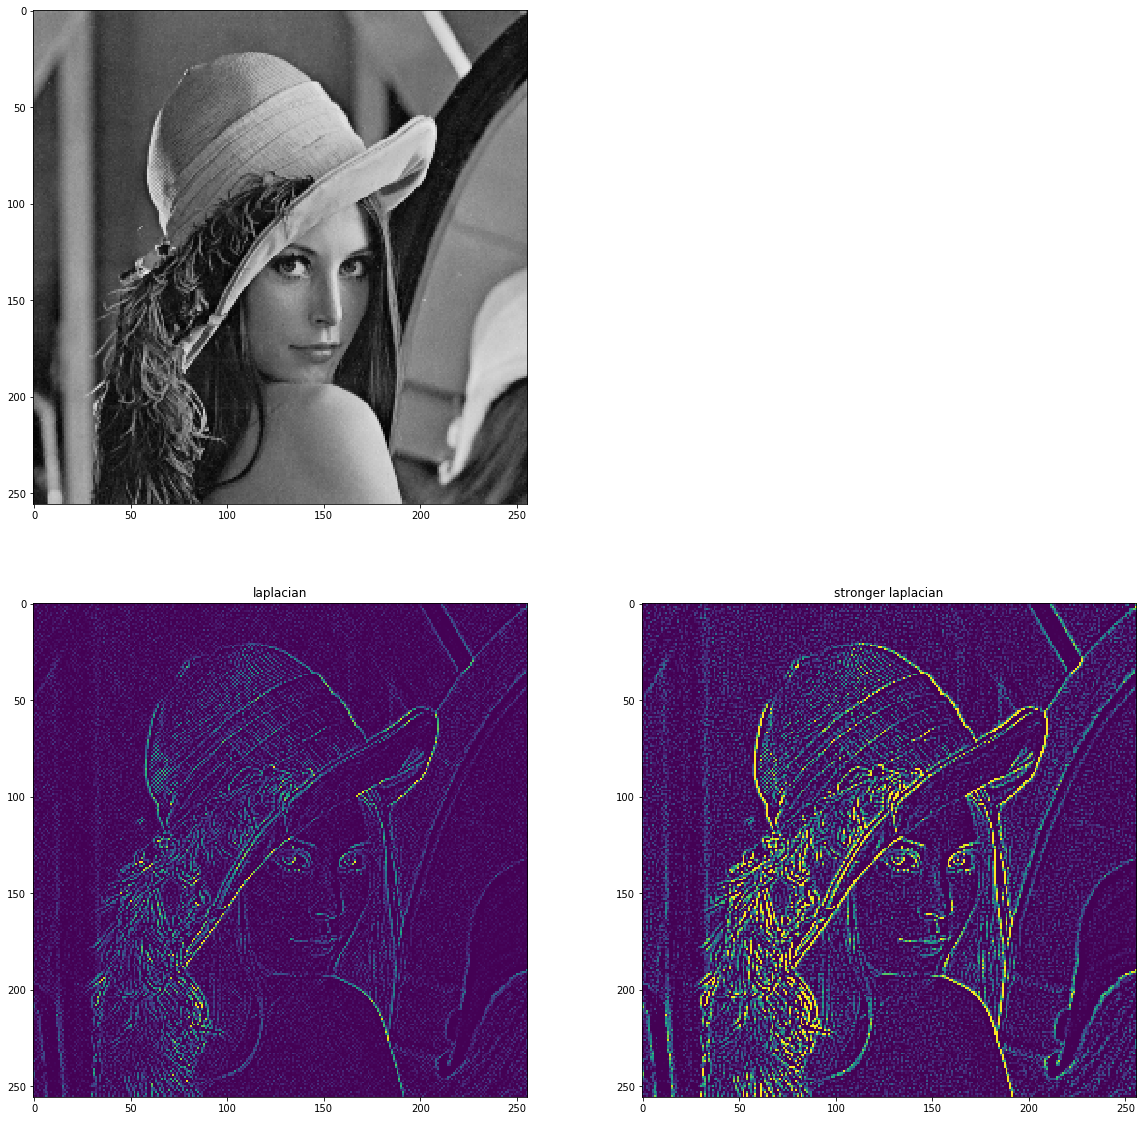

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.title('origin image')
plt.subplot(221)
image = cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, vmin=0, vmax=255, cmap='gray')

# cv2.filter2D
plt.subplot(223)
plt.title('laplacian')
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)

# cv2.filter2D
plt.subplot(224)
plt.title('stronger laplacian')
kernel = np.array([[ 1, 1, 1],
                   [ 1,-8, 1],
                   [ 1, 1, 1]])
tmp    = cv2.filter2D(image, ddepth=-1, kernel=kernel)
plt.imshow(tmp)
plt.show()